In [1]:
import sys
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io
from scipy.interpolate import griddata
import time
from itertools import product, combinations
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
# from plotting import newfig, savefig
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import normalize

In [2]:
naca_file_path = 'naca4412.mat' #filepath

In [3]:
naca_file_path

'naca4412.mat'

In [4]:
!ls  #list of files in the current directory

best_model.h5
bottom10n_csv.csv
bottom1n_csv.csv
bottom2n_csv.csv
bottom4n_csv.csv
data_naca4412
model.h5
model.json
naca4412.mat
net_0.csv
net(1).xlsx
net.csv
net.xlsx
predictions.csv
predictions.xlsx
results.csv
results with predictors- U,V (Re-100K).xlsx
results_with_predictors-U,V,uu,vv,uv,ww (Re-100K).xlsx
test.csv
top10n_csv.csv
top1n_csv(1).xlsx
top1n_csv(2).xlsx
top1n_csv.csv
top1n_csv.xlsx
top2n_csv.csv
top2n_csv.xlsx
top4n_csv.csv
train_loss.csv
u_mean_0620000
val_loss.csv
wrles.csv
WRLES_modeling-comparing LOW.ipynb
WRLES_modeling.ipynb
WRLES_modeling-PINNS-Copy1.ipynb
WRLES_modeling-PINNS.ipynb
WRLES_modeling-PINNS-tensorflow-Copy1.ipynb
WRLES_modeling-PINNS-tensorflow-Copy2.ipynb
WRLES_modeling-PINNS-tensorflow.ipynb


In [5]:
#loading the matlab data file
from scipy.io import loadmat
naca_df = loadmat(naca_file_path)
top1n_df = naca_df['top1n']
top2n_df = naca_df['top2n']
top4n_df = naca_df['top4n']
top10n_df = naca_df['top10n']

bottom1n_df = naca_df['bottom1n']
bottom2n_df = naca_df['bottom2n']
bottom4n_df = naca_df['bottom4n']
bottom10n_df = naca_df['bottom10n']

print(type(naca_df))
print(type(top1n_df))
print(top1n_df.shape)


<class 'dict'>
<class 'numpy.ndarray'>
(1, 50)


# Data Top1n


In [6]:

#extracting all the individual columns as dataframes and then combining them
col_xa = top1n_df['xa']
col_xa = col_xa.reshape((50,1))
df_xa  = pd.DataFrame(col_xa , columns = ['xa'])

col_ya = top1n_df['ya']
col_ya = col_ya.reshape((50,1))
df_ya  = pd.DataFrame(col_ya , columns = ['ya'])

col_yn = top1n_df['yn']
col_yn = col_yn.reshape((50,1))
df_yn  = pd.DataFrame(col_yn , columns = ['yn'])

col_x  = top1n_df['x']
col_x = col_x.reshape((50,1))
df_x  = pd.DataFrame(col_x , columns = ['x'])

col_y  = top1n_df['y']
col_y = col_y.reshape((50,1))
df_y  = pd.DataFrame(col_y , columns = ['y'])

col_nu = top1n_df['nu']
col_nu = col_nu.reshape((50,1))
df_nu  = pd.DataFrame(col_nu , columns = ['nu'])

col_ut = top1n_df['ut']
col_ut = col_ut.reshape((50,1))
df_ut  = pd.DataFrame(col_ut , columns = ['ut'])

col_delta99  = top1n_df['delta99']
col_delta99 = col_delta99.reshape((50,1))
df_delta99  = pd.DataFrame(col_delta99 , columns = ['delta99'])

col_deltas  = top1n_df['deltas']
col_deltas = col_deltas.reshape((50,1))
df_deltas  = pd.DataFrame(col_deltas , columns = ['deltas'])

col_theta  = top1n_df['theta']
col_theta = col_theta.reshape((50,1))
df_theta  = pd.DataFrame(col_theta , columns = ['theta'])

col_Ue  = top1n_df['Ue']
col_Ue = col_Ue.reshape((50,1))
df_Ue  = pd.DataFrame(col_Ue , columns = ['Ue'])

col_Ret  = top1n_df['Ret']
col_Ret = col_Ret.reshape((50,1))
df_Ret  = pd.DataFrame(col_Ret , columns = ['Ret'])

col_Reds  = top1n_df['Reds']
col_Reds = col_Reds.reshape((50,1))
df_Reds  = pd.DataFrame(col_Reds , columns = ['Reds'])

col_Reth  = top1n_df['Reth']
col_Reth = col_Reth.reshape((50,1))
df_Reth  = pd.DataFrame(col_Reth , columns = ['Reth'])

col_Cf  = top1n_df['Cf']
col_Cf = col_Cf.reshape((50,1))
df_Cf  = pd.DataFrame(col_Cf , columns = ['Cf'])

col_beta  = top1n_df['beta']
col_beta = col_beta.reshape((50,1))
df_beta  = pd.DataFrame(col_beta , columns = ['beta'])

col_U  = top1n_df['U']
col_U = col_U.reshape((50,1))
df_U  = pd.DataFrame(col_U , columns = ['U'])

col_V  = top1n_df['V']
col_V = col_V.reshape((50,1))
df_V  = pd.DataFrame(col_V , columns = ['V'])

col_uu  = top1n_df['uu']
col_uu = col_uu.reshape((50,1))
df_uu  = pd.DataFrame(col_uu , columns = ['uu'])

col_vv  = top1n_df['vv']
col_vv = col_vv.reshape((50,1))
df_vv  = pd.DataFrame(col_vv , columns = ['vv'])

col_ww  = top1n_df['ww']
col_ww = col_ww.reshape((50,1))
df_ww  = pd.DataFrame(col_ww , columns = ['ww'])

col_uv  = top1n_df['uv']
col_uv = col_uv.reshape((50,1))
df_uv  = pd.DataFrame(col_uv , columns = ['uv'])

col_P  = top1n_df['P']
col_P = col_P.reshape((50,1))
df_P  = pd.DataFrame(col_P , columns = ['P'])

col_prms  = top1n_df['prms']
col_prms = col_prms.reshape((50,1))
df_prms  = pd.DataFrame(col_prms , columns = ['prms'])

col_Pk  = top1n_df['Pk']
col_Pk = col_Pk.reshape((50,1))
df_Pk  = pd.DataFrame(col_Pk , columns = ['Pk'])

col_Dk  = top1n_df['Dk']
col_Dk = col_Dk.reshape((50,1))
df_Dk  = pd.DataFrame(col_Dk , columns = ['Dk'])

col_Tk  = top1n_df['Tk']
col_Tk = col_Tk.reshape((50,1))
df_Tk  = pd.DataFrame(col_Tk , columns = ['Tk'])

col_VDk  = top1n_df['VDk']
col_VDk = col_VDk.reshape((50,1))
df_VDk  = pd.DataFrame(col_VDk , columns = ['VDk'])

col_VPGk  = top1n_df['VPGk']
col_VPGk = col_VPGk.reshape((50,1))
df_VPGk  = pd.DataFrame(col_VPGk , columns = ['VPGk'])



# df_yn.iloc[0]['yn'][1] #refers to the single value at index [1] in the first of the arrays in 'yn'[0] 
temp = np.zeros((len(df_yn.iloc[0]['yn'])))
temp_data_full = np.zeros((len(col_xa)*len(df_yn.iloc[0]['yn']),29)) #a (2600, 29) array to get a 1D database (xa,ya,yn,...) - all the 29 fields
print(len(col_xa))
# print(df_yn.iloc[1]['yn'])

counter = 0

for j in range (0, len(col_xa)):

    p = 0
    for k in range (counter, counter + len(df_yn.iloc[j]['yn'])):
        
        #xa
        temp_data_full[k][0] = col_xa[j]

        #ya
        temp_data_full[k][1] = col_ya[j]
        
        #yn
        temp_data_full[k][2] = df_yn.iloc[j]['yn'][p]
      
        #x
        temp_data_full[k][3] = df_x.iloc[j]['x'][p]
        
        #y
        temp_data_full[k][4] = df_y.iloc[j]['y'][p]
        
        #nu
        temp_data_full[k][5] = col_nu[j]
        
        #ut
        temp_data_full[k][6] = col_ut[j]
        
        #delta99
        temp_data_full[k][7] = col_delta99[j]
        
        #deltas
        temp_data_full[k][8] = col_deltas[j]
        
        #theta
        temp_data_full[k][9] = col_theta[j]
        
        #Ue
        temp_data_full[k][10] = col_Ue[j]
        
        #Ret
        temp_data_full[k][11] = col_Ret[j]
        
        #Reds
        temp_data_full[k][12] = col_Reds[j]
        
        #Reth
        temp_data_full[k][13] = col_Reth[j]
        
        #Cf
        temp_data_full[k][14] = col_Cf[j]
        
        #beta
        temp_data_full[k][15] = col_beta[j]
        
        #U
        temp_data_full[k][16] = df_U.iloc[j]['U'][p]
        
        #V
        temp_data_full[k][17] = df_V.iloc[j]['V'][p]
        
        #uu
        temp_data_full[k][18] = df_uu.iloc[j]['uu'][p]
        
        #vv
        temp_data_full[k][19] = df_vv.iloc[j]['vv'][p]
        
        #ww
        temp_data_full[k][20] = df_ww.iloc[j]['ww'][p]
        
        #uv
        temp_data_full[k][21] = df_uv.iloc[j]['uv'][p]
        
        #P
        temp_data_full[k][22] = df_P.iloc[j]['P'][p]
        
        #prms
        temp_data_full[k][23] = df_prms.iloc[j]['prms'][p]
        
        #Pk
        temp_data_full[k][24] = df_Pk.iloc[j]['Pk'][p]
        
        #Dk
        temp_data_full[k][25] = df_Dk.iloc[j]['Dk'][p]
        
        #Tk
        temp_data_full[k][26] = df_Tk.iloc[j]['Tk'][p]
        
        #VDk
        temp_data_full[k][27] = df_VDk.iloc[j]['VDk'][p]
        
        #VPGk
        temp_data_full[k][28] = df_VPGk.iloc[j]['VPGk'][p]
        
        
           
        
        counter = counter+1
        p = p + 1

# print(type(df_xa.iloc[1]['xa']))

#Adding Reynold's number of the flow as one of the predictors

col_ReNo = np.zeros((len(temp_data_full),1))
for i in range (len(col_ReNo)):
    col_ReNo[i] = 100000
# print(col_ReNo)
# print(len(temp_data_full))
df_ReNo = pd.DataFrame(col_ReNo, columns = ['ReNo'])
# print(df_ReNo)

# print(type(temp_data_full))

#converting the array to dataframe

top1n_df = pd.DataFrame(temp_data_full, columns = ['xa', 'ya', 'yn', 'x', 'y', 'nu', 'ut', 'delta99', 'deltas', 'theta',\
                                                  'Ue', 'Ret', 'Reds', 'Reth', 'Cf', 'beta', 'U', 'V', 'uu', 'vv', 'ww',\
                                                   'uv', 'P', 'prms','Pk', 'Dk', 'Tk', 'VDk', 'VPGk'])

top1n_df = pd.concat([top1n_df, df_ReNo], axis = 1)
# print(top1n_df)
                                
#writing the dataframe top1n_df into csv file 
top1n_df.to_csv("top1n_csv.csv")
    

50


# Data Top2n


In [7]:

#extracting all the individual columns as dataframes and then combining them for top2n
col_xa = top2n_df['xa']
col_xa = col_xa.reshape((50,1))
df_xa  = pd.DataFrame(col_xa , columns = ['xa'])

col_ya = top2n_df['ya']
col_ya = col_ya.reshape((50,1))
df_ya  = pd.DataFrame(col_ya , columns = ['ya'])

col_yn = top2n_df['yn']
col_yn = col_yn.reshape((50,1))
df_yn  = pd.DataFrame(col_yn , columns = ['yn'])

col_x  = top2n_df['x']
col_x = col_x.reshape((50,1))
df_x  = pd.DataFrame(col_x , columns = ['x'])

col_y  = top2n_df['y']
col_y = col_y.reshape((50,1))
df_y  = pd.DataFrame(col_y , columns = ['y'])

col_nu = top2n_df['nu']
col_nu = col_nu.reshape((50,1))
df_nu  = pd.DataFrame(col_nu , columns = ['nu'])

col_ut = top2n_df['ut']
col_ut = col_ut.reshape((50,1))
df_ut  = pd.DataFrame(col_ut , columns = ['ut'])

col_delta99  = top2n_df['delta99']
col_delta99 = col_delta99.reshape((50,1))
df_delta99  = pd.DataFrame(col_delta99 , columns = ['delta99'])

col_deltas  = top2n_df['deltas']
col_deltas = col_deltas.reshape((50,1))
df_deltas  = pd.DataFrame(col_deltas , columns = ['deltas'])

col_theta  = top2n_df['theta']
col_theta = col_theta.reshape((50,1))
df_theta  = pd.DataFrame(col_theta , columns = ['theta'])

col_Ue  = top2n_df['Ue']
col_Ue = col_Ue.reshape((50,1))
df_Ue  = pd.DataFrame(col_Ue , columns = ['Ue'])

col_Ret  = top2n_df['Ret']
col_Ret = col_Ret.reshape((50,1))
df_Ret  = pd.DataFrame(col_Ret , columns = ['Ret'])

col_Reds  = top2n_df['Reds']
col_Reds = col_Reds.reshape((50,1))
df_Reds  = pd.DataFrame(col_Reds , columns = ['Reds'])

col_Reth  = top2n_df['Reth']
col_Reth = col_Reth.reshape((50,1))
df_Reth  = pd.DataFrame(col_Reth , columns = ['Reth'])

col_Cf  = top2n_df['Cf']
col_Cf = col_Cf.reshape((50,1))
df_Cf  = pd.DataFrame(col_Cf , columns = ['Cf'])

col_beta  = top2n_df['beta']
col_beta = col_beta.reshape((50,1))
df_beta  = pd.DataFrame(col_beta , columns = ['beta'])

col_U  = top2n_df['U']
col_U = col_U.reshape((50,1))
df_U  = pd.DataFrame(col_U , columns = ['U'])

col_V  = top2n_df['V']
col_V = col_V.reshape((50,1))
df_V  = pd.DataFrame(col_V , columns = ['V'])

col_uu  = top2n_df['uu']
col_uu = col_uu.reshape((50,1))
df_uu  = pd.DataFrame(col_uu , columns = ['uu'])

col_vv  = top2n_df['vv']
col_vv = col_vv.reshape((50,1))
df_vv  = pd.DataFrame(col_vv , columns = ['vv'])

col_ww  = top2n_df['ww']
col_ww = col_ww.reshape((50,1))
df_ww  = pd.DataFrame(col_ww , columns = ['ww'])

col_uv  = top2n_df['uv']
col_uv = col_uv.reshape((50,1))
df_uv  = pd.DataFrame(col_uv , columns = ['uv'])

col_P  = top2n_df['P']
col_P = col_P.reshape((50,1))
df_P  = pd.DataFrame(col_P , columns = ['P'])

col_prms  = top2n_df['prms']
col_prms = col_prms.reshape((50,1))
df_prms  = pd.DataFrame(col_prms , columns = ['prms'])

col_Pk  = top2n_df['Pk']
col_Pk = col_Pk.reshape((50,1))
df_Pk  = pd.DataFrame(col_Pk , columns = ['Pk'])

col_Dk  = top2n_df['Dk']
col_Dk = col_Dk.reshape((50,1))
df_Dk  = pd.DataFrame(col_Dk , columns = ['Dk'])

col_Tk  = top2n_df['Tk']
col_Tk = col_Tk.reshape((50,1))
df_Tk  = pd.DataFrame(col_Tk , columns = ['Tk'])

col_VDk  = top2n_df['VDk']
col_VDk = col_VDk.reshape((50,1))
df_VDk  = pd.DataFrame(col_VDk , columns = ['VDk'])

col_VPGk  = top2n_df['VPGk']
col_VPGk = col_VPGk.reshape((50,1))
df_VPGk  = pd.DataFrame(col_VPGk , columns = ['VPGk'])


# df_yn.iloc[0]['yn'][1] #refers to the single value at index [1] in the first of the arrays in 'yn'[0] 
temp = np.zeros((len(df_yn.iloc[0]['yn'])))
temp_data_full = np.zeros((len(col_xa)*len(df_yn.iloc[0]['yn']),29)) #a (2600, 29) array to get a 1D database (xa,ya,yn,...) - all the 29 fields
print(len(col_xa))
# print(df_yn.iloc[1]['yn'])

counter = 0

for j in range (0, len(col_xa)):

    p = 0
    for k in range (counter, counter + len(df_yn.iloc[j]['yn'])):
        
        #xa
        temp_data_full[k][0] = col_xa[j]

        #ya
        temp_data_full[k][1] = col_ya[j]
        
        #yn
        temp_data_full[k][2] = df_yn.iloc[j]['yn'][p]
      
        #x
        temp_data_full[k][3] = df_x.iloc[j]['x'][p]
        
        #y
        temp_data_full[k][4] = df_y.iloc[j]['y'][p]
        
        #nu
        temp_data_full[k][5] = col_nu[j]
        
        #ut
        temp_data_full[k][6] = col_ut[j]
        
        #delta99
        temp_data_full[k][7] = col_delta99[j]
        
        #deltas
        temp_data_full[k][8] = col_deltas[j]
        
        #theta
        temp_data_full[k][9] = col_theta[j]
        
        #Ue
        temp_data_full[k][10] = col_Ue[j]
        
        #Ret
        temp_data_full[k][11] = col_Ret[j]
        
        #Reds
        temp_data_full[k][12] = col_Reds[j]
        
        #Reth
        temp_data_full[k][13] = col_Reth[j]
        
        #Cf
        temp_data_full[k][14] = col_Cf[j]
        
        #beta
        temp_data_full[k][15] = col_beta[j]
        
        #U
        temp_data_full[k][16] = df_U.iloc[j]['U'][p]
        
        #V
        temp_data_full[k][17] = df_V.iloc[j]['V'][p]
        
        #uu
        temp_data_full[k][18] = df_uu.iloc[j]['uu'][p]
        
        #vv
        temp_data_full[k][19] = df_vv.iloc[j]['vv'][p]
        
        #ww
        temp_data_full[k][20] = df_ww.iloc[j]['ww'][p]
        
        #uv
        temp_data_full[k][21] = df_uv.iloc[j]['uv'][p]
        
        #P
        temp_data_full[k][22] = df_P.iloc[j]['P'][p]
        
        #prms
        temp_data_full[k][23] = df_prms.iloc[j]['prms'][p]
        
        #Pk
        temp_data_full[k][24] = df_Pk.iloc[j]['Pk'][p]
        
        #Dk
        temp_data_full[k][25] = df_Dk.iloc[j]['Dk'][p]
        
        #Tk
        temp_data_full[k][26] = df_Tk.iloc[j]['Tk'][p]
        
        #VDk
        temp_data_full[k][27] = df_VDk.iloc[j]['VDk'][p]
        
        #VPGk
        temp_data_full[k][28] = df_VPGk.iloc[j]['VPGk'][p]
        
                
        
        counter = counter+1
        p = p + 1

        
# print(type(df_xa.iloc[1]['xa']))

# print(type(temp_data_full))
#converting the array to dataframe

#Adding Reynold's number of the flow as one of the predictors
col_ReNo = np.zeros((len(temp_data_full),1))
for i in range (len(col_ReNo)):
    col_ReNo[i] = 200000
# print(col_ReNo)
# print(len(temp_data_full))
df_ReNo = pd.DataFrame(col_ReNo, columns = ['ReNo'])
# print(df_ReNo)

top2n_df = pd.DataFrame(temp_data_full, columns = ['xa', 'ya', 'yn', 'x', 'y', 'nu', 'ut', 'delta99', 'deltas', 'theta',\
                                                  'Ue', 'Ret', 'Reds', 'Reth', 'Cf', 'beta', 'U', 'V', 'uu', 'vv', 'ww',\
                                                   'uv', 'P', 'prms','Pk', 'Dk', 'Tk', 'VDk', 'VPGk'])
top2n_df = pd.concat([top2n_df, df_ReNo], axis = 1)
print(top2n_df)
                                                   
#writing the dataframe top1n_df into csv file 
top2n_df.to_csv("top2n_csv.csv")
    


50
            xa        ya        yn         x         y        nu        ut  \
0     0.153465  0.079619  0.000000  0.153465  0.079619  0.000005  0.082015   
1     0.153465  0.079619  0.000027  0.153459  0.079645  0.000005  0.082015   
2     0.153465  0.079619  0.000057  0.153453  0.079675  0.000005  0.082015   
3     0.153465  0.079619  0.000092  0.153446  0.079709  0.000005  0.082015   
4     0.153465  0.079619  0.000133  0.153438  0.079749  0.000005  0.082015   
5     0.153465  0.079619  0.000179  0.153428  0.079794  0.000005  0.082015   
6     0.153465  0.079619  0.000232  0.153417  0.079846  0.000005  0.082015   
7     0.153465  0.079619  0.000294  0.153404  0.079906  0.000005  0.082015   
8     0.153465  0.079619  0.000364  0.153390  0.079975  0.000005  0.082015   
9     0.153465  0.079619  0.000445  0.153373  0.080055  0.000005  0.082015   
10    0.153465  0.079619  0.000539  0.153354  0.080146  0.000005  0.082015   
11    0.153465  0.079619  0.000646  0.153331  0.080251  0.000

# Data Top4n


In [8]:

#extracting all the individual columns as dataframes and then combining them for top2n
col_xa = top4n_df['xa']
col_xa = col_xa.reshape((50,1))
df_xa  = pd.DataFrame(col_xa , columns = ['xa'])

col_ya = top4n_df['ya']
col_ya = col_ya.reshape((50,1))
df_ya  = pd.DataFrame(col_ya , columns = ['ya'])

col_yn = top4n_df['yn']
col_yn = col_yn.reshape((50,1))
df_yn  = pd.DataFrame(col_yn , columns = ['yn'])

col_x  = top4n_df['x']
col_x = col_x.reshape((50,1))
df_x  = pd.DataFrame(col_x , columns = ['x'])

col_y  = top4n_df['y']
col_y = col_y.reshape((50,1))
df_y  = pd.DataFrame(col_y , columns = ['y'])

col_nu = top4n_df['nu']
col_nu = col_nu.reshape((50,1))
df_nu  = pd.DataFrame(col_nu , columns = ['nu'])

col_ut = top4n_df['ut']
col_ut = col_ut.reshape((50,1))
df_ut  = pd.DataFrame(col_ut , columns = ['ut'])

col_delta99  = top4n_df['delta99']
col_delta99 = col_delta99.reshape((50,1))
df_delta99  = pd.DataFrame(col_delta99 , columns = ['delta99'])

col_deltas  = top4n_df['deltas']
col_deltas = col_deltas.reshape((50,1))
df_deltas  = pd.DataFrame(col_deltas , columns = ['deltas'])

col_theta  = top4n_df['theta']
col_theta = col_theta.reshape((50,1))
df_theta  = pd.DataFrame(col_theta , columns = ['theta'])

col_Ue  = top4n_df['Ue']
col_Ue = col_Ue.reshape((50,1))
df_Ue  = pd.DataFrame(col_Ue , columns = ['Ue'])

col_Ret  = top4n_df['Ret']
col_Ret = col_Ret.reshape((50,1))
df_Ret  = pd.DataFrame(col_Ret , columns = ['Ret'])

col_Reds  = top4n_df['Reds']
col_Reds = col_Reds.reshape((50,1))
df_Reds  = pd.DataFrame(col_Reds , columns = ['Reds'])

col_Reth  = top4n_df['Reth']
col_Reth = col_Reth.reshape((50,1))
df_Reth  = pd.DataFrame(col_Reth , columns = ['Reth'])

col_Cf  = top4n_df['Cf']
col_Cf = col_Cf.reshape((50,1))
df_Cf  = pd.DataFrame(col_Cf , columns = ['Cf'])

col_beta  = top4n_df['beta']
col_beta = col_beta.reshape((50,1))
df_beta  = pd.DataFrame(col_beta , columns = ['beta'])

col_U  = top4n_df['U']
col_U = col_U.reshape((50,1))
df_U  = pd.DataFrame(col_U , columns = ['U'])

col_V  = top4n_df['V']
col_V = col_V.reshape((50,1))
df_V  = pd.DataFrame(col_V , columns = ['V'])

col_uu  = top4n_df['uu']
col_uu = col_uu.reshape((50,1))
df_uu  = pd.DataFrame(col_uu , columns = ['uu'])

col_vv  = top4n_df['vv']
col_vv = col_vv.reshape((50,1))
df_vv  = pd.DataFrame(col_vv , columns = ['vv'])

col_ww  = top4n_df['ww']
col_ww = col_ww.reshape((50,1))
df_ww  = pd.DataFrame(col_ww , columns = ['ww'])

col_uv  = top4n_df['uv']
col_uv = col_uv.reshape((50,1))
df_uv  = pd.DataFrame(col_uv , columns = ['uv'])

col_P  = top4n_df['P']
col_P = col_P.reshape((50,1))
df_P  = pd.DataFrame(col_P , columns = ['P'])

col_prms  = top4n_df['prms']
col_prms = col_prms.reshape((50,1))
df_prms  = pd.DataFrame(col_prms , columns = ['prms'])

col_Pk  = top4n_df['Pk']
col_Pk = col_Pk.reshape((50,1))
df_Pk  = pd.DataFrame(col_Pk , columns = ['Pk'])

col_Dk  = top4n_df['Dk']
col_Dk = col_Dk.reshape((50,1))
df_Dk  = pd.DataFrame(col_Dk , columns = ['Dk'])

col_Tk  = top4n_df['Tk']
col_Tk = col_Tk.reshape((50,1))
df_Tk  = pd.DataFrame(col_Tk , columns = ['Tk'])

col_VDk  = top4n_df['VDk']
col_VDk = col_VDk.reshape((50,1))
df_VDk  = pd.DataFrame(col_VDk , columns = ['VDk'])

col_VPGk  = top4n_df['VPGk']
col_VPGk = col_VPGk.reshape((50,1))
df_VPGk  = pd.DataFrame(col_VPGk , columns = ['VPGk'])


# df_yn.iloc[0]['yn'][1] #refers to the single value at index [1] in the first of the arrays in 'yn'[0] 
temp = np.zeros((len(df_yn.iloc[0]['yn'])))
temp_data_full = np.zeros((len(col_xa)*len(df_yn.iloc[0]['yn']),29)) #a (2600, 29) array to get a 1D database (xa,ya,yn,...) - all the 29 fields
print(len(col_xa))
# print(df_yn.iloc[1]['yn'])

counter = 0

for j in range (0, len(col_xa)):

    p = 0
    for k in range (counter, counter + len(df_yn.iloc[j]['yn'])):
        
        #xa
        temp_data_full[k][0] = col_xa[j]

        #ya
        temp_data_full[k][1] = col_ya[j]
        
        #yn
        temp_data_full[k][2] = df_yn.iloc[j]['yn'][p]
      
        #x
        temp_data_full[k][3] = df_x.iloc[j]['x'][p]
        
        #y
        temp_data_full[k][4] = df_y.iloc[j]['y'][p]
        
        #nu
        temp_data_full[k][5] = col_nu[j]
        
        #ut
        temp_data_full[k][6] = col_ut[j]
        
        #delta99
        temp_data_full[k][7] = col_delta99[j]
        
        #deltas
        temp_data_full[k][8] = col_deltas[j]
        
        #theta
        temp_data_full[k][9] = col_theta[j]
        
        #Ue
        temp_data_full[k][10] = col_Ue[j]
        
        #Ret
        temp_data_full[k][11] = col_Ret[j]
        
        #Reds
        temp_data_full[k][12] = col_Reds[j]
        
        #Reth
        temp_data_full[k][13] = col_Reth[j]
        
        #Cf
        temp_data_full[k][14] = col_Cf[j]
        
        #beta
        temp_data_full[k][15] = col_beta[j]
        
        #U
        temp_data_full[k][16] = df_U.iloc[j]['U'][p]
        
        #V
        temp_data_full[k][17] = df_V.iloc[j]['V'][p]
        
        #uu
        temp_data_full[k][18] = df_uu.iloc[j]['uu'][p]
        
        #vv
        temp_data_full[k][19] = df_vv.iloc[j]['vv'][p]
        
        #ww
        temp_data_full[k][20] = df_ww.iloc[j]['ww'][p]
        
        #uv
        temp_data_full[k][21] = df_uv.iloc[j]['uv'][p]
        
        #P
        temp_data_full[k][22] = df_P.iloc[j]['P'][p]
        
        #prms
        temp_data_full[k][23] = df_prms.iloc[j]['prms'][p]
        
        #Pk
        temp_data_full[k][24] = df_Pk.iloc[j]['Pk'][p]
        
        #Dk
        temp_data_full[k][25] = df_Dk.iloc[j]['Dk'][p]
        
        #Tk
        temp_data_full[k][26] = df_Tk.iloc[j]['Tk'][p]
        
        #VDk
        temp_data_full[k][27] = df_VDk.iloc[j]['VDk'][p]
        
        #VPGk
        temp_data_full[k][28] = df_VPGk.iloc[j]['VPGk'][p]
        
                
        
        counter = counter+1
        p = p + 1

        
# print(type(df_xa.iloc[1]['xa']))

# print(type(temp_data_full))
#converting the array to dataframe

#Adding Reynold's number of the flow as one of the predictors
col_ReNo = np.zeros((len(temp_data_full),1))
for i in range (len(col_ReNo)):
    col_ReNo[i] = 400000

df_ReNo = pd.DataFrame(col_ReNo, columns = ['ReNo'])
# print(df_ReNo)

top4n_df = pd.DataFrame(temp_data_full, columns = ['xa', 'ya', 'yn', 'x', 'y', 'nu', 'ut', 'delta99', 'deltas', 'theta',\
                                                  'Ue', 'Ret', 'Reds', 'Reth', 'Cf', 'beta', 'U', 'V', 'uu', 'vv', 'ww',\
                                                   'uv', 'P', 'prms','Pk', 'Dk', 'Tk', 'VDk', 'VPGk'])
top4n_df = pd.concat([top4n_df, df_ReNo], axis = 1)
print(top4n_df)
                                                   
#writing the dataframe top1n_df into csv file 
top4n_df.to_csv("top4n_csv.csv")
    


50
            xa        ya        yn         x         y        nu        ut  \
0     0.153465  0.079619  0.000000  0.153465  0.079619  0.000003  0.080873   
1     0.153465  0.079619  0.000027  0.153459  0.079645  0.000003  0.080873   
2     0.153465  0.079619  0.000057  0.153453  0.079675  0.000003  0.080873   
3     0.153465  0.079619  0.000092  0.153446  0.079709  0.000003  0.080873   
4     0.153465  0.079619  0.000133  0.153438  0.079749  0.000003  0.080873   
5     0.153465  0.079619  0.000179  0.153428  0.079794  0.000003  0.080873   
6     0.153465  0.079619  0.000232  0.153417  0.079846  0.000003  0.080873   
7     0.153465  0.079619  0.000294  0.153404  0.079906  0.000003  0.080873   
8     0.153465  0.079619  0.000364  0.153390  0.079975  0.000003  0.080873   
9     0.153465  0.079619  0.000445  0.153373  0.080055  0.000003  0.080873   
10    0.153465  0.079619  0.000539  0.153354  0.080146  0.000003  0.080873   
11    0.153465  0.079619  0.000646  0.153331  0.080251  0.000

# Data Top10n


In [9]:

#extracting all the individual columns as dataframes and then combining them for top10n
col_xa = top10n_df['xa']
col_xa = col_xa.reshape((50,1))
df_xa  = pd.DataFrame(col_xa , columns = ['xa'])

col_ya = top10n_df['ya']
col_ya = col_ya.reshape((50,1))
df_ya  = pd.DataFrame(col_ya , columns = ['ya'])

col_yn = top10n_df['yn']
col_yn = col_yn.reshape((50,1))
df_yn  = pd.DataFrame(col_yn , columns = ['yn'])

col_x  = top10n_df['x']
col_x = col_x.reshape((50,1))
df_x  = pd.DataFrame(col_x , columns = ['x'])

col_y  = top10n_df['y']
col_y = col_y.reshape((50,1))
df_y  = pd.DataFrame(col_y , columns = ['y'])

col_nu = top10n_df['nu']
col_nu = col_nu.reshape((50,1))
df_nu  = pd.DataFrame(col_nu , columns = ['nu'])

col_ut = top10n_df['ut']
col_ut = col_ut.reshape((50,1))
df_ut  = pd.DataFrame(col_ut , columns = ['ut'])

col_delta99  = top10n_df['delta99']
col_delta99 = col_delta99.reshape((50,1))
df_delta99  = pd.DataFrame(col_delta99 , columns = ['delta99'])

col_deltas  = top10n_df['deltas']
col_deltas = col_deltas.reshape((50,1))
df_deltas  = pd.DataFrame(col_deltas , columns = ['deltas'])

col_theta  = top10n_df['theta']
col_theta = col_theta.reshape((50,1))
df_theta  = pd.DataFrame(col_theta , columns = ['theta'])

col_Ue  = top10n_df['Ue']
col_Ue = col_Ue.reshape((50,1))
df_Ue  = pd.DataFrame(col_Ue , columns = ['Ue'])

col_Ret  = top10n_df['Ret']
col_Ret = col_Ret.reshape((50,1))
df_Ret  = pd.DataFrame(col_Ret , columns = ['Ret'])

col_Reds  = top10n_df['Reds']
col_Reds = col_Reds.reshape((50,1))
df_Reds  = pd.DataFrame(col_Reds , columns = ['Reds'])

col_Reth  = top10n_df['Reth']
col_Reth = col_Reth.reshape((50,1))
df_Reth  = pd.DataFrame(col_Reth , columns = ['Reth'])

col_Cf  = top10n_df['Cf']
col_Cf = col_Cf.reshape((50,1))
df_Cf  = pd.DataFrame(col_Cf , columns = ['Cf'])

col_beta  = top10n_df['beta']
col_beta = col_beta.reshape((50,1))
df_beta  = pd.DataFrame(col_beta , columns = ['beta'])

col_U  = top10n_df['U']
col_U = col_U.reshape((50,1))
df_U  = pd.DataFrame(col_U , columns = ['U'])

col_V  = top10n_df['V']
col_V = col_V.reshape((50,1))
df_V  = pd.DataFrame(col_V , columns = ['V'])

col_uu  = top10n_df['uu']
col_uu = col_uu.reshape((50,1))
df_uu  = pd.DataFrame(col_uu , columns = ['uu'])

col_vv  = top10n_df['vv']
col_vv = col_vv.reshape((50,1))
df_vv  = pd.DataFrame(col_vv , columns = ['vv'])

col_ww  = top10n_df['ww']
col_ww = col_ww.reshape((50,1))
df_ww  = pd.DataFrame(col_ww , columns = ['ww'])

col_uv  = top10n_df['uv']
col_uv = col_uv.reshape((50,1))
df_uv  = pd.DataFrame(col_uv , columns = ['uv'])

col_P  = top10n_df['P']
col_P = col_P.reshape((50,1))
df_P  = pd.DataFrame(col_P , columns = ['P'])

col_prms  = top10n_df['prms']
col_prms = col_prms.reshape((50,1))
df_prms  = pd.DataFrame(col_prms , columns = ['prms'])

col_Pk  = top10n_df['Pk']
col_Pk = col_Pk.reshape((50,1))
df_Pk  = pd.DataFrame(col_Pk , columns = ['Pk'])

col_Dk  = top10n_df['Dk']
col_Dk = col_Dk.reshape((50,1))
df_Dk  = pd.DataFrame(col_Dk , columns = ['Dk'])

col_Tk  = top10n_df['Tk']
col_Tk = col_Tk.reshape((50,1))
df_Tk  = pd.DataFrame(col_Tk , columns = ['Tk'])

col_VDk  = top10n_df['VDk']
col_VDk = col_VDk.reshape((50,1))
df_VDk  = pd.DataFrame(col_VDk , columns = ['VDk'])

col_VPGk  = top10n_df['VPGk']
col_VPGk = col_VPGk.reshape((50,1))
df_VPGk  = pd.DataFrame(col_VPGk , columns = ['VPGk'])


# df_yn.iloc[0]['yn'][1] #refers to the single value at index [1] in the first of the arrays in 'yn'[0] 
temp = np.zeros((len(df_yn.iloc[0]['yn'])))
temp_data_full = np.zeros((len(col_xa)*len(df_yn.iloc[0]['yn']),29)) #a (2600, 29) array to get a 1D database (xa,ya,yn,...) - all the 29 fields
print(len(col_xa))
# print(df_yn.iloc[1]['yn'])

counter = 0

for j in range (0, len(col_xa)):

    p = 0
    for k in range (counter, counter + len(df_yn.iloc[j]['yn'])):
        
        #xa
        temp_data_full[k][0] = col_xa[j]

        #ya
        temp_data_full[k][1] = col_ya[j]
        
        #yn
        temp_data_full[k][2] = df_yn.iloc[j]['yn'][p]
      
        #x
        temp_data_full[k][3] = df_x.iloc[j]['x'][p]
        
        #y
        temp_data_full[k][4] = df_y.iloc[j]['y'][p]
        
        #nu
        temp_data_full[k][5] = col_nu[j]
        
        #ut
        temp_data_full[k][6] = col_ut[j]
        
        #delta99
        temp_data_full[k][7] = col_delta99[j]
        
        #deltas
        temp_data_full[k][8] = col_deltas[j]
        
        #theta
        temp_data_full[k][9] = col_theta[j]
        
        #Ue
        temp_data_full[k][10] = col_Ue[j]
        
        #Ret
        temp_data_full[k][11] = col_Ret[j]
        
        #Reds
        temp_data_full[k][12] = col_Reds[j]
        
        #Reth
        temp_data_full[k][13] = col_Reth[j]
        
        #Cf
        temp_data_full[k][14] = col_Cf[j]
        
        #beta
        temp_data_full[k][15] = col_beta[j]
        
        #U
        temp_data_full[k][16] = df_U.iloc[j]['U'][p]
        
        #V
        temp_data_full[k][17] = df_V.iloc[j]['V'][p]
        
        #uu
        temp_data_full[k][18] = df_uu.iloc[j]['uu'][p]
        
        #vv
        temp_data_full[k][19] = df_vv.iloc[j]['vv'][p]
        
        #ww
        temp_data_full[k][20] = df_ww.iloc[j]['ww'][p]
        
        #uv
        temp_data_full[k][21] = df_uv.iloc[j]['uv'][p]
        
        #P
        temp_data_full[k][22] = df_P.iloc[j]['P'][p]
        
        #prms
        temp_data_full[k][23] = df_prms.iloc[j]['prms'][p]
        
        #Pk
        temp_data_full[k][24] = df_Pk.iloc[j]['Pk'][p]
        
        #Dk
        temp_data_full[k][25] = df_Dk.iloc[j]['Dk'][p]
        
        #Tk
        temp_data_full[k][26] = df_Tk.iloc[j]['Tk'][p]
        
        #VDk
        temp_data_full[k][27] = df_VDk.iloc[j]['VDk'][p]
        
        #VPGk
        temp_data_full[k][28] = df_VPGk.iloc[j]['VPGk'][p]
        
                
        
        counter = counter+1
        p = p + 1

        
# print(type(df_xa.iloc[1]['xa']))

# print(type(temp_data_full))
#converting the array to dataframe

#Adding Reynold's number of the flow as one of the predictors
col_ReNo = np.zeros((len(temp_data_full),1))
for i in range (len(col_ReNo)):
    col_ReNo[i] = 1000000

df_ReNo = pd.DataFrame(col_ReNo, columns = ['ReNo'])
# print(df_ReNo)

top10n_df = pd.DataFrame(temp_data_full, columns = ['xa', 'ya', 'yn', 'x', 'y', 'nu', 'ut', 'delta99', 'deltas', 'theta',\
                                                  'Ue', 'Ret', 'Reds', 'Reth', 'Cf', 'beta', 'U', 'V', 'uu', 'vv', 'ww',\
                                                   'uv', 'P', 'prms','Pk', 'Dk', 'Tk', 'VDk', 'VPGk'])
top10n_df = pd.concat([top10n_df, df_ReNo], axis = 1)
print(top10n_df)
                                                   
#writing the dataframe top1n_df into csv file 
top10n_df.to_csv("top10n_csv.csv")
    


50
            xa        ya        yn         x         y        nu        ut  \
0     0.153465  0.079619  0.000000  0.153465  0.079619  0.000001  0.075181   
1     0.153465  0.079619  0.000007  0.153463  0.079626  0.000001  0.075181   
2     0.153465  0.079619  0.000015  0.153462  0.079634  0.000001  0.075181   
3     0.153465  0.079619  0.000025  0.153460  0.079643  0.000001  0.075181   
4     0.153465  0.079619  0.000036  0.153458  0.079654  0.000001  0.075181   
5     0.153465  0.079619  0.000048  0.153455  0.079666  0.000001  0.075181   
6     0.153465  0.079619  0.000063  0.153452  0.079680  0.000001  0.075181   
7     0.153465  0.079619  0.000079  0.153449  0.079696  0.000001  0.075181   
8     0.153465  0.079619  0.000098  0.153445  0.079715  0.000001  0.075181   
9     0.153465  0.079619  0.000120  0.153440  0.079736  0.000001  0.075181   
10    0.153465  0.079619  0.000145  0.153435  0.079761  0.000001  0.075181   
11    0.153465  0.079619  0.000174  0.153429  0.079789  0.000

# Data Bottom1n


In [10]:

#extracting all the individual columns as dataframes and then combining them for bottom1n
col_xa = bottom1n_df['xa']
col_xa = col_xa.reshape((50,1))
df_xa  = pd.DataFrame(col_xa , columns = ['xa'])

col_ya = bottom1n_df['ya']
col_ya = col_ya.reshape((50,1))
df_ya  = pd.DataFrame(col_ya , columns = ['ya'])

col_yn = bottom1n_df['yn']
col_yn = col_yn.reshape((50,1))
df_yn  = pd.DataFrame(col_yn , columns = ['yn'])

col_x  = bottom1n_df['x']
col_x = col_x.reshape((50,1))
df_x  = pd.DataFrame(col_x , columns = ['x'])

col_y  = bottom1n_df['y']
col_y = col_y.reshape((50,1))
df_y  = pd.DataFrame(col_y , columns = ['y'])

col_nu = bottom1n_df['nu']
col_nu = col_nu.reshape((50,1))
df_nu  = pd.DataFrame(col_nu , columns = ['nu'])

col_ut = bottom1n_df['ut']
col_ut = col_ut.reshape((50,1))
df_ut  = pd.DataFrame(col_ut , columns = ['ut'])

col_delta99  = bottom1n_df['delta99']
col_delta99 = col_delta99.reshape((50,1))
df_delta99  = pd.DataFrame(col_delta99 , columns = ['delta99'])

col_deltas  = bottom1n_df['deltas']
col_deltas = col_deltas.reshape((50,1))
df_deltas  = pd.DataFrame(col_deltas , columns = ['deltas'])

col_theta  = bottom1n_df['theta']
col_theta = col_theta.reshape((50,1))
df_theta  = pd.DataFrame(col_theta , columns = ['theta'])

col_Ue  = bottom1n_df['Ue']
col_Ue = col_Ue.reshape((50,1))
df_Ue  = pd.DataFrame(col_Ue , columns = ['Ue'])

col_Ret  = bottom1n_df['Ret']
col_Ret = col_Ret.reshape((50,1))
df_Ret  = pd.DataFrame(col_Ret , columns = ['Ret'])

col_Reds  = bottom1n_df['Reds']
col_Reds = col_Reds.reshape((50,1))
df_Reds  = pd.DataFrame(col_Reds , columns = ['Reds'])

col_Reth  = bottom1n_df['Reth']
col_Reth = col_Reth.reshape((50,1))
df_Reth  = pd.DataFrame(col_Reth , columns = ['Reth'])

col_Cf  = bottom1n_df['Cf']
col_Cf = col_Cf.reshape((50,1))
df_Cf  = pd.DataFrame(col_Cf , columns = ['Cf'])

col_beta  = bottom1n_df['beta']
col_beta = col_beta.reshape((50,1))
df_beta  = pd.DataFrame(col_beta , columns = ['beta'])

col_U  = bottom1n_df['U']
col_U = col_U.reshape((50,1))
df_U  = pd.DataFrame(col_U , columns = ['U'])

col_V  = bottom1n_df['V']
col_V = col_V.reshape((50,1))
df_V  = pd.DataFrame(col_V , columns = ['V'])

col_uu  = bottom1n_df['uu']
col_uu = col_uu.reshape((50,1))
df_uu  = pd.DataFrame(col_uu , columns = ['uu'])

col_vv  = bottom1n_df['vv']
col_vv = col_vv.reshape((50,1))
df_vv  = pd.DataFrame(col_vv , columns = ['vv'])

col_ww  = bottom1n_df['ww']
col_ww = col_ww.reshape((50,1))
df_ww  = pd.DataFrame(col_ww , columns = ['ww'])

col_uv  = bottom1n_df['uv']
col_uv = col_uv.reshape((50,1))
df_uv  = pd.DataFrame(col_uv , columns = ['uv'])

col_P  = bottom1n_df['P']
col_P = col_P.reshape((50,1))
df_P  = pd.DataFrame(col_P , columns = ['P'])

col_prms  = bottom1n_df['prms']
col_prms = col_prms.reshape((50,1))
df_prms  = pd.DataFrame(col_prms , columns = ['prms'])

col_Pk  = bottom1n_df['Pk']
col_Pk = col_Pk.reshape((50,1))
df_Pk  = pd.DataFrame(col_Pk , columns = ['Pk'])

col_Dk  = bottom1n_df['Dk']
col_Dk = col_Dk.reshape((50,1))
df_Dk  = pd.DataFrame(col_Dk , columns = ['Dk'])

col_Tk  = bottom1n_df['Tk']
col_Tk = col_Tk.reshape((50,1))
df_Tk  = pd.DataFrame(col_Tk , columns = ['Tk'])

col_VDk  = bottom1n_df['VDk']
col_VDk = col_VDk.reshape((50,1))
df_VDk  = pd.DataFrame(col_VDk , columns = ['VDk'])

col_VPGk  = bottom1n_df['VPGk']
col_VPGk = col_VPGk.reshape((50,1))
df_VPGk  = pd.DataFrame(col_VPGk , columns = ['VPGk'])


# df_yn.iloc[0]['yn'][1] #refers to the single value at index [1] in the first of the arrays in 'yn'[0] 
temp = np.zeros((len(df_yn.iloc[0]['yn'])))
temp_data_full = np.zeros((len(col_xa)*len(df_yn.iloc[0]['yn']),29)) #a (2600, 29) array to get a 1D database (xa,ya,yn,...) - all the 29 fields
print(len(col_xa))
# print(df_yn.iloc[1]['yn'])

counter = 0

for j in range (0, len(col_xa)):

    p = 0
    for k in range (counter, counter + len(df_yn.iloc[j]['yn'])):
        
        #xa
        temp_data_full[k][0] = col_xa[j]

        #ya
        temp_data_full[k][1] = col_ya[j]
        
        #yn
        temp_data_full[k][2] = df_yn.iloc[j]['yn'][p]
      
        #x
        temp_data_full[k][3] = df_x.iloc[j]['x'][p]
        
        #y
        temp_data_full[k][4] = df_y.iloc[j]['y'][p]
        
        #nu
        temp_data_full[k][5] = col_nu[j]
        
        #ut
        temp_data_full[k][6] = col_ut[j]
        
        #delta99
        temp_data_full[k][7] = col_delta99[j]
        
        #deltas
        temp_data_full[k][8] = col_deltas[j]
        
        #theta
        temp_data_full[k][9] = col_theta[j]
        
        #Ue
        temp_data_full[k][10] = col_Ue[j]
        
        #Ret
        temp_data_full[k][11] = col_Ret[j]
        
        #Reds
        temp_data_full[k][12] = col_Reds[j]
        
        #Reth
        temp_data_full[k][13] = col_Reth[j]
        
        #Cf
        temp_data_full[k][14] = col_Cf[j]
        
        #beta
        temp_data_full[k][15] = col_beta[j]
        
        #U
        temp_data_full[k][16] = df_U.iloc[j]['U'][p]
        
        #V
        temp_data_full[k][17] = df_V.iloc[j]['V'][p]
        
        #uu
        temp_data_full[k][18] = df_uu.iloc[j]['uu'][p]
        
        #vv
        temp_data_full[k][19] = df_vv.iloc[j]['vv'][p]
        
        #ww
        temp_data_full[k][20] = df_ww.iloc[j]['ww'][p]
        
        #uv
        temp_data_full[k][21] = df_uv.iloc[j]['uv'][p]
        
        #P
        temp_data_full[k][22] = df_P.iloc[j]['P'][p]
        
        #prms
        temp_data_full[k][23] = df_prms.iloc[j]['prms'][p]
        
        #Pk
        temp_data_full[k][24] = df_Pk.iloc[j]['Pk'][p]
        
        #Dk
        temp_data_full[k][25] = df_Dk.iloc[j]['Dk'][p]
        
        #Tk
        temp_data_full[k][26] = df_Tk.iloc[j]['Tk'][p]
        
        #VDk
        temp_data_full[k][27] = df_VDk.iloc[j]['VDk'][p]
        
        #VPGk
        temp_data_full[k][28] = df_VPGk.iloc[j]['VPGk'][p]
        
                
        
        counter = counter+1
        p = p + 1

        
# print(type(df_xa.iloc[1]['xa']))

# print(type(temp_data_full))
#converting the array to dataframe
#Adding Reynold's number of the flow as one of the predictors

col_ReNo = np.zeros((len(temp_data_full),1))
for i in range (len(col_ReNo)):
    col_ReNo[i] = 100000

df_ReNo = pd.DataFrame(col_ReNo, columns = ['ReNo'])
# print(df_ReNo)

bottom1n_df = pd.DataFrame(temp_data_full, columns = ['xa', 'ya', 'yn', 'x', 'y', 'nu', 'ut', 'delta99', 'deltas', 'theta',\
                                                  'Ue', 'Ret', 'Reds', 'Reth', 'Cf', 'beta', 'U', 'V', 'uu', 'vv', 'ww',\
                                                   'uv', 'P', 'prms','Pk', 'Dk', 'Tk', 'VDk', 'VPGk'])

bottom1n_df = pd.concat([bottom1n_df, df_ReNo], axis =1)
print(bottom1n_df)
                                                   
#writing the dataframe top1n_df into csv file 
bottom1n_df.to_csv("bottom1n_csv.csv")
    


50
            xa        ya        yn         x         y       nu        ut  \
0     0.166434 -0.028431  0.000000  0.166434 -0.028431  0.00001  0.065679   
1     0.166434 -0.028431  0.000027  0.166434 -0.028458  0.00001  0.065679   
2     0.166434 -0.028431  0.000057  0.166435 -0.028488  0.00001  0.065679   
3     0.166434 -0.028431  0.000092  0.166436 -0.028523  0.00001  0.065679   
4     0.166434 -0.028431  0.000133  0.166437 -0.028564  0.00001  0.065679   
5     0.166434 -0.028431  0.000179  0.166439 -0.028610  0.00001  0.065679   
6     0.166434 -0.028431  0.000232  0.166440 -0.028663  0.00001  0.065679   
7     0.166434 -0.028431  0.000294  0.166442 -0.028725  0.00001  0.065679   
8     0.166434 -0.028431  0.000364  0.166444 -0.028795  0.00001  0.065679   
9     0.166434 -0.028431  0.000445  0.166447 -0.028876  0.00001  0.065679   
10    0.166434 -0.028431  0.000539  0.166449 -0.028970  0.00001  0.065679   
11    0.166434 -0.028431  0.000646  0.166452 -0.029077  0.00001  0.065679

# Data Bottom2n


In [11]:

#extracting all the individual columns as dataframes and then combining them for bottom2n
col_xa = bottom2n_df['xa']
col_xa = col_xa.reshape((50,1))
df_xa  = pd.DataFrame(col_xa , columns = ['xa'])

col_ya = bottom2n_df['ya']
col_ya = col_ya.reshape((50,1))
df_ya  = pd.DataFrame(col_ya , columns = ['ya'])

col_yn = bottom2n_df['yn']
col_yn = col_yn.reshape((50,1))
df_yn  = pd.DataFrame(col_yn , columns = ['yn'])

col_x  = bottom2n_df['x']
col_x = col_x.reshape((50,1))
df_x  = pd.DataFrame(col_x , columns = ['x'])

col_y  = bottom2n_df['y']
col_y = col_y.reshape((50,1))
df_y  = pd.DataFrame(col_y , columns = ['y'])

col_nu = bottom2n_df['nu']
col_nu = col_nu.reshape((50,1))
df_nu  = pd.DataFrame(col_nu , columns = ['nu'])

col_ut = bottom2n_df['ut']
col_ut = col_ut.reshape((50,1))
df_ut  = pd.DataFrame(col_ut , columns = ['ut'])

col_delta99  = bottom2n_df['delta99']
col_delta99 = col_delta99.reshape((50,1))
df_delta99  = pd.DataFrame(col_delta99 , columns = ['delta99'])

col_deltas  = bottom2n_df['deltas']
col_deltas = col_deltas.reshape((50,1))
df_deltas  = pd.DataFrame(col_deltas , columns = ['deltas'])

col_theta  = bottom2n_df['theta']
col_theta = col_theta.reshape((50,1))
df_theta  = pd.DataFrame(col_theta , columns = ['theta'])

col_Ue  = bottom2n_df['Ue']
col_Ue = col_Ue.reshape((50,1))
df_Ue  = pd.DataFrame(col_Ue , columns = ['Ue'])

col_Ret  = bottom2n_df['Ret']
col_Ret = col_Ret.reshape((50,1))
df_Ret  = pd.DataFrame(col_Ret , columns = ['Ret'])

col_Reds  = bottom2n_df['Reds']
col_Reds = col_Reds.reshape((50,1))
df_Reds  = pd.DataFrame(col_Reds , columns = ['Reds'])

col_Reth  = bottom2n_df['Reth']
col_Reth = col_Reth.reshape((50,1))
df_Reth  = pd.DataFrame(col_Reth , columns = ['Reth'])

col_Cf  = bottom2n_df['Cf']
col_Cf = col_Cf.reshape((50,1))
df_Cf  = pd.DataFrame(col_Cf , columns = ['Cf'])

col_beta  = bottom2n_df['beta']
col_beta = col_beta.reshape((50,1))
df_beta  = pd.DataFrame(col_beta , columns = ['beta'])

col_U  = bottom2n_df['U']
col_U = col_U.reshape((50,1))
df_U  = pd.DataFrame(col_U , columns = ['U'])

col_V  = bottom2n_df['V']
col_V = col_V.reshape((50,1))
df_V  = pd.DataFrame(col_V , columns = ['V'])

col_uu  = bottom2n_df['uu']
col_uu = col_uu.reshape((50,1))
df_uu  = pd.DataFrame(col_uu , columns = ['uu'])

col_vv  = bottom2n_df['vv']
col_vv = col_vv.reshape((50,1))
df_vv  = pd.DataFrame(col_vv , columns = ['vv'])

col_ww  = bottom2n_df['ww']
col_ww = col_ww.reshape((50,1))
df_ww  = pd.DataFrame(col_ww , columns = ['ww'])

col_uv  = bottom2n_df['uv']
col_uv = col_uv.reshape((50,1))
df_uv  = pd.DataFrame(col_uv , columns = ['uv'])

col_P  = bottom2n_df['P']
col_P = col_P.reshape((50,1))
df_P  = pd.DataFrame(col_P , columns = ['P'])

col_prms  = bottom2n_df['prms']
col_prms = col_prms.reshape((50,1))
df_prms  = pd.DataFrame(col_prms , columns = ['prms'])

col_Pk  = bottom2n_df['Pk']
col_Pk = col_Pk.reshape((50,1))
df_Pk  = pd.DataFrame(col_Pk , columns = ['Pk'])

col_Dk  = bottom2n_df['Dk']
col_Dk = col_Dk.reshape((50,1))
df_Dk  = pd.DataFrame(col_Dk , columns = ['Dk'])

col_Tk  = bottom2n_df['Tk']
col_Tk = col_Tk.reshape((50,1))
df_Tk  = pd.DataFrame(col_Tk , columns = ['Tk'])

col_VDk  = bottom2n_df['VDk']
col_VDk = col_VDk.reshape((50,1))
df_VDk  = pd.DataFrame(col_VDk , columns = ['VDk'])

col_VPGk  = bottom2n_df['VPGk']
col_VPGk = col_VPGk.reshape((50,1))
df_VPGk  = pd.DataFrame(col_VPGk , columns = ['VPGk'])


# df_yn.iloc[0]['yn'][1] #refers to the single value at index [1] in the first of the arrays in 'yn'[0] 
temp = np.zeros((len(df_yn.iloc[0]['yn'])))
temp_data_full = np.zeros((len(col_xa)*len(df_yn.iloc[0]['yn']),29)) #a (2600, 29) array to get a 1D database (xa,ya,yn,...) - all the 29 fields
print(len(col_xa))
# print(df_yn.iloc[1]['yn'])

counter = 0

for j in range (0, len(col_xa)):

    p = 0
    for k in range (counter, counter + len(df_yn.iloc[j]['yn'])):
        
        #xa
        temp_data_full[k][0] = col_xa[j]

        #ya
        temp_data_full[k][1] = col_ya[j]
        
        #yn
        temp_data_full[k][2] = df_yn.iloc[j]['yn'][p]
      
        #x
        temp_data_full[k][3] = df_x.iloc[j]['x'][p]
        
        #y
        temp_data_full[k][4] = df_y.iloc[j]['y'][p]
        
        #nu
        temp_data_full[k][5] = col_nu[j]
        
        #ut
        temp_data_full[k][6] = col_ut[j]
        
        #delta99
        temp_data_full[k][7] = col_delta99[j]
        
        #deltas
        temp_data_full[k][8] = col_deltas[j]
        
        #theta
        temp_data_full[k][9] = col_theta[j]
        
        #Ue
        temp_data_full[k][10] = col_Ue[j]
        
        #Ret
        temp_data_full[k][11] = col_Ret[j]
        
        #Reds
        temp_data_full[k][12] = col_Reds[j]
        
        #Reth
        temp_data_full[k][13] = col_Reth[j]
        
        #Cf
        temp_data_full[k][14] = col_Cf[j]
        
        #beta
        temp_data_full[k][15] = col_beta[j]
        
        #U
        temp_data_full[k][16] = df_U.iloc[j]['U'][p]
        
        #V
        temp_data_full[k][17] = df_V.iloc[j]['V'][p]
        
        #uu
        temp_data_full[k][18] = df_uu.iloc[j]['uu'][p]
        
        #vv
        temp_data_full[k][19] = df_vv.iloc[j]['vv'][p]
        
        #ww
        temp_data_full[k][20] = df_ww.iloc[j]['ww'][p]
        
        #uv
        temp_data_full[k][21] = df_uv.iloc[j]['uv'][p]
        
        #P
        temp_data_full[k][22] = df_P.iloc[j]['P'][p]
        
        #prms
        temp_data_full[k][23] = df_prms.iloc[j]['prms'][p]
        
        #Pk
        temp_data_full[k][24] = df_Pk.iloc[j]['Pk'][p]
        
        #Dk
        temp_data_full[k][25] = df_Dk.iloc[j]['Dk'][p]
        
        #Tk
        temp_data_full[k][26] = df_Tk.iloc[j]['Tk'][p]
        
        #VDk
        temp_data_full[k][27] = df_VDk.iloc[j]['VDk'][p]
        
        #VPGk
        temp_data_full[k][28] = df_VPGk.iloc[j]['VPGk'][p]
        
                
        
        counter = counter+1
        p = p + 1

        
# print(type(df_xa.iloc[1]['xa']))

# print(type(temp_data_full))
#converting the array to dataframe
#Adding Reynold's number of the flow as one of the predictors

col_ReNo = np.zeros((len(temp_data_full),1))
for i in range (len(col_ReNo)):
    col_ReNo[i] = 200000
# print(col_ReNo)
# print(len(temp_data_full))
df_ReNo = pd.DataFrame(col_ReNo, columns = ['ReNo'])
# print(df_ReNo)

bottom2n_df = pd.DataFrame(temp_data_full, columns = ['xa', 'ya', 'yn', 'x', 'y', 'nu', 'ut', 'delta99', 'deltas', 'theta',\
                                                  'Ue', 'Ret', 'Reds', 'Reth', 'Cf', 'beta', 'U', 'V', 'uu', 'vv', 'ww',\
                                                   'uv', 'P', 'prms','Pk', 'Dk', 'Tk', 'VDk', 'VPGk'])
bottom2n_df = pd.concat([bottom2n_df, df_ReNo], axis = 1)
print(bottom2n_df)
                                                   
#writing the dataframe top1n_df into csv file 
bottom2n_df.to_csv("bottom2n_csv.csv")
    


50
            xa        ya        yn         x         y        nu        ut  \
0     0.166434 -0.028431  0.000000  0.166434 -0.028431  0.000005  0.054872   
1     0.166434 -0.028431  0.000027  0.166434 -0.028458  0.000005  0.054872   
2     0.166434 -0.028431  0.000057  0.166435 -0.028488  0.000005  0.054872   
3     0.166434 -0.028431  0.000092  0.166436 -0.028523  0.000005  0.054872   
4     0.166434 -0.028431  0.000133  0.166437 -0.028564  0.000005  0.054872   
5     0.166434 -0.028431  0.000179  0.166439 -0.028610  0.000005  0.054872   
6     0.166434 -0.028431  0.000232  0.166440 -0.028663  0.000005  0.054872   
7     0.166434 -0.028431  0.000294  0.166442 -0.028725  0.000005  0.054872   
8     0.166434 -0.028431  0.000364  0.166444 -0.028795  0.000005  0.054872   
9     0.166434 -0.028431  0.000445  0.166447 -0.028876  0.000005  0.054872   
10    0.166434 -0.028431  0.000539  0.166449 -0.028970  0.000005  0.054872   
11    0.166434 -0.028431  0.000646  0.166452 -0.029077  0.000

# Data Bottom4n


In [12]:

#extracting all the individual columns as dataframes and then combining them for bottom4n
col_xa = bottom4n_df['xa']
col_xa = col_xa.reshape((50,1))
df_xa  = pd.DataFrame(col_xa , columns = ['xa'])

col_ya = bottom4n_df['ya']
col_ya = col_ya.reshape((50,1))
df_ya  = pd.DataFrame(col_ya , columns = ['ya'])

col_yn = bottom4n_df['yn']
col_yn = col_yn.reshape((50,1))
df_yn  = pd.DataFrame(col_yn , columns = ['yn'])

col_x  = bottom4n_df['x']
col_x = col_x.reshape((50,1))
df_x  = pd.DataFrame(col_x , columns = ['x'])

col_y  = bottom4n_df['y']
col_y = col_y.reshape((50,1))
df_y  = pd.DataFrame(col_y , columns = ['y'])

col_nu = bottom4n_df['nu']
col_nu = col_nu.reshape((50,1))
df_nu  = pd.DataFrame(col_nu , columns = ['nu'])

col_ut = bottom4n_df['ut']
col_ut = col_ut.reshape((50,1))
df_ut  = pd.DataFrame(col_ut , columns = ['ut'])

col_delta99  = bottom4n_df['delta99']
col_delta99 = col_delta99.reshape((50,1))
df_delta99  = pd.DataFrame(col_delta99 , columns = ['delta99'])

col_deltas  = bottom4n_df['deltas']
col_deltas = col_deltas.reshape((50,1))
df_deltas  = pd.DataFrame(col_deltas , columns = ['deltas'])

col_theta  = bottom4n_df['theta']
col_theta = col_theta.reshape((50,1))
df_theta  = pd.DataFrame(col_theta , columns = ['theta'])

col_Ue  = bottom4n_df['Ue']
col_Ue = col_Ue.reshape((50,1))
df_Ue  = pd.DataFrame(col_Ue , columns = ['Ue'])

col_Ret  = bottom4n_df['Ret']
col_Ret = col_Ret.reshape((50,1))
df_Ret  = pd.DataFrame(col_Ret , columns = ['Ret'])

col_Reds  = bottom4n_df['Reds']
col_Reds = col_Reds.reshape((50,1))
df_Reds  = pd.DataFrame(col_Reds , columns = ['Reds'])

col_Reth  = bottom4n_df['Reth']
col_Reth = col_Reth.reshape((50,1))
df_Reth  = pd.DataFrame(col_Reth , columns = ['Reth'])

col_Cf  = bottom4n_df['Cf']
col_Cf = col_Cf.reshape((50,1))
df_Cf  = pd.DataFrame(col_Cf , columns = ['Cf'])

col_beta  = bottom4n_df['beta']
col_beta = col_beta.reshape((50,1))
df_beta  = pd.DataFrame(col_beta , columns = ['beta'])

col_U  = bottom4n_df['U']
col_U = col_U.reshape((50,1))
df_U  = pd.DataFrame(col_U , columns = ['U'])

col_V  = bottom4n_df['V']
col_V = col_V.reshape((50,1))
df_V  = pd.DataFrame(col_V , columns = ['V'])

col_uu  = bottom4n_df['uu']
col_uu = col_uu.reshape((50,1))
df_uu  = pd.DataFrame(col_uu , columns = ['uu'])

col_vv  = bottom4n_df['vv']
col_vv = col_vv.reshape((50,1))
df_vv  = pd.DataFrame(col_vv , columns = ['vv'])

col_ww  = bottom4n_df['ww']
col_ww = col_ww.reshape((50,1))
df_ww  = pd.DataFrame(col_ww , columns = ['ww'])

col_uv  = bottom4n_df['uv']
col_uv = col_uv.reshape((50,1))
df_uv  = pd.DataFrame(col_uv , columns = ['uv'])

col_P  = bottom4n_df['P']
col_P = col_P.reshape((50,1))
df_P  = pd.DataFrame(col_P , columns = ['P'])

col_prms  = bottom4n_df['prms']
col_prms = col_prms.reshape((50,1))
df_prms  = pd.DataFrame(col_prms , columns = ['prms'])

col_Pk  = bottom4n_df['Pk']
col_Pk = col_Pk.reshape((50,1))
df_Pk  = pd.DataFrame(col_Pk , columns = ['Pk'])

col_Dk  = bottom4n_df['Dk']
col_Dk = col_Dk.reshape((50,1))
df_Dk  = pd.DataFrame(col_Dk , columns = ['Dk'])

col_Tk  = bottom4n_df['Tk']
col_Tk = col_Tk.reshape((50,1))
df_Tk  = pd.DataFrame(col_Tk , columns = ['Tk'])

col_VDk  = bottom4n_df['VDk']
col_VDk = col_VDk.reshape((50,1))
df_VDk  = pd.DataFrame(col_VDk , columns = ['VDk'])

col_VPGk  = bottom4n_df['VPGk']
col_VPGk = col_VPGk.reshape((50,1))
df_VPGk  = pd.DataFrame(col_VPGk , columns = ['VPGk'])


# df_yn.iloc[0]['yn'][1] #refers to the single value at index [1] in the first of the arrays in 'yn'[0] 
temp = np.zeros((len(df_yn.iloc[0]['yn'])))
temp_data_full = np.zeros((len(col_xa)*len(df_yn.iloc[0]['yn']),29)) #a (2600, 29) array to get a 1D database (xa,ya,yn,...) - all the 29 fields
print(len(col_xa))
# print(df_yn.iloc[1]['yn'])

counter = 0

for j in range (0, len(col_xa)):

    p = 0
    for k in range (counter, counter + len(df_yn.iloc[j]['yn'])):
        
        #xa
        temp_data_full[k][0] = col_xa[j]

        #ya
        temp_data_full[k][1] = col_ya[j]
        
        #yn
        temp_data_full[k][2] = df_yn.iloc[j]['yn'][p]
      
        #x
        temp_data_full[k][3] = df_x.iloc[j]['x'][p]
        
        #y
        temp_data_full[k][4] = df_y.iloc[j]['y'][p]
        
        #nu
        temp_data_full[k][5] = col_nu[j]
        
        #ut
        temp_data_full[k][6] = col_ut[j]
        
        #delta99
        temp_data_full[k][7] = col_delta99[j]
        
        #deltas
        temp_data_full[k][8] = col_deltas[j]
        
        #theta
        temp_data_full[k][9] = col_theta[j]
        
        #Ue
        temp_data_full[k][10] = col_Ue[j]
        
        #Ret
        temp_data_full[k][11] = col_Ret[j]
        
        #Reds
        temp_data_full[k][12] = col_Reds[j]
        
        #Reth
        temp_data_full[k][13] = col_Reth[j]
        
        #Cf
        temp_data_full[k][14] = col_Cf[j]
        
        #beta
        temp_data_full[k][15] = col_beta[j]
        
        #U
        temp_data_full[k][16] = df_U.iloc[j]['U'][p]
        
        #V
        temp_data_full[k][17] = df_V.iloc[j]['V'][p]
        
        #uu
        temp_data_full[k][18] = df_uu.iloc[j]['uu'][p]
        
        #vv
        temp_data_full[k][19] = df_vv.iloc[j]['vv'][p]
        
        #ww
        temp_data_full[k][20] = df_ww.iloc[j]['ww'][p]
        
        #uv
        temp_data_full[k][21] = df_uv.iloc[j]['uv'][p]
        
        #P
        temp_data_full[k][22] = df_P.iloc[j]['P'][p]
        
        #prms
        temp_data_full[k][23] = df_prms.iloc[j]['prms'][p]
        
        #Pk
        temp_data_full[k][24] = df_Pk.iloc[j]['Pk'][p]
        
        #Dk
        temp_data_full[k][25] = df_Dk.iloc[j]['Dk'][p]
        
        #Tk
        temp_data_full[k][26] = df_Tk.iloc[j]['Tk'][p]
        
        #VDk
        temp_data_full[k][27] = df_VDk.iloc[j]['VDk'][p]
        
        #VPGk
        temp_data_full[k][28] = df_VPGk.iloc[j]['VPGk'][p]
        
                
        
        counter = counter+1
        p = p + 1

        
# print(type(df_xa.iloc[1]['xa']))

# print(type(temp_data_full))
#converting the array to dataframe
#Adding Reynold's number of the flow as one of the predictors

col_ReNo = np.zeros((len(temp_data_full),1))
for i in range (len(col_ReNo)):
    col_ReNo[i] = 400000

df_ReNo = pd.DataFrame(col_ReNo, columns = ['ReNo'])
# print(df_ReNo)

bottom4n_df = pd.DataFrame(temp_data_full, columns = ['xa', 'ya', 'yn', 'x', 'y', 'nu', 'ut', 'delta99', 'deltas', 'theta',\
                                                  'Ue', 'Ret', 'Reds', 'Reth', 'Cf', 'beta', 'U', 'V', 'uu', 'vv', 'ww',\
                                                   'uv', 'P', 'prms','Pk', 'Dk', 'Tk', 'VDk', 'VPGk'])
bottom4n_df = pd.concat([bottom4n_df, df_ReNo], axis =1)
print(bottom4n_df)
                                                   
#writing the dataframe top1n_df into csv file 
bottom4n_df.to_csv("bottom4n_csv.csv")
    


50
            xa        ya        yn         x         y        nu        ut  \
0     0.166434 -0.028431  0.000000  0.166434 -0.028431  0.000003  0.047845   
1     0.166434 -0.028431  0.000027  0.166434 -0.028458  0.000003  0.047845   
2     0.166434 -0.028431  0.000057  0.166435 -0.028488  0.000003  0.047845   
3     0.166434 -0.028431  0.000092  0.166436 -0.028523  0.000003  0.047845   
4     0.166434 -0.028431  0.000133  0.166437 -0.028564  0.000003  0.047845   
5     0.166434 -0.028431  0.000179  0.166439 -0.028610  0.000003  0.047845   
6     0.166434 -0.028431  0.000232  0.166440 -0.028663  0.000003  0.047845   
7     0.166434 -0.028431  0.000294  0.166442 -0.028725  0.000003  0.047845   
8     0.166434 -0.028431  0.000364  0.166444 -0.028795  0.000003  0.047845   
9     0.166434 -0.028431  0.000445  0.166447 -0.028876  0.000003  0.047845   
10    0.166434 -0.028431  0.000539  0.166449 -0.028970  0.000003  0.047845   
11    0.166434 -0.028431  0.000646  0.166452 -0.029077  0.000

# Data Bottom10n


In [13]:

#extracting all the individual columns as dataframes and then combining them for bottom10n
col_xa = bottom10n_df['xa']
col_xa = col_xa.reshape((50,1))
df_xa  = pd.DataFrame(col_xa , columns = ['xa'])

col_ya = bottom10n_df['ya']
col_ya = col_ya.reshape((50,1))
df_ya  = pd.DataFrame(col_ya , columns = ['ya'])

col_yn = bottom10n_df['yn']
col_yn = col_yn.reshape((50,1))
df_yn  = pd.DataFrame(col_yn , columns = ['yn'])

col_x  = bottom10n_df['x']
col_x = col_x.reshape((50,1))
df_x  = pd.DataFrame(col_x , columns = ['x'])

col_y  = bottom10n_df['y']
col_y = col_y.reshape((50,1))
df_y  = pd.DataFrame(col_y , columns = ['y'])

col_nu = bottom10n_df['nu']
col_nu = col_nu.reshape((50,1))
df_nu  = pd.DataFrame(col_nu , columns = ['nu'])

col_ut = bottom10n_df['ut']
col_ut = col_ut.reshape((50,1))
df_ut  = pd.DataFrame(col_ut , columns = ['ut'])

col_delta99  = bottom10n_df['delta99']
col_delta99 = col_delta99.reshape((50,1))
df_delta99  = pd.DataFrame(col_delta99 , columns = ['delta99'])

col_deltas  = bottom10n_df['deltas']
col_deltas = col_deltas.reshape((50,1))
df_deltas  = pd.DataFrame(col_deltas , columns = ['deltas'])

col_theta  = bottom10n_df['theta']
col_theta = col_theta.reshape((50,1))
df_theta  = pd.DataFrame(col_theta , columns = ['theta'])

col_Ue  = bottom10n_df['Ue']
col_Ue = col_Ue.reshape((50,1))
df_Ue  = pd.DataFrame(col_Ue , columns = ['Ue'])

col_Ret  = bottom10n_df['Ret']
col_Ret = col_Ret.reshape((50,1))
df_Ret  = pd.DataFrame(col_Ret , columns = ['Ret'])

col_Reds  = bottom10n_df['Reds']
col_Reds = col_Reds.reshape((50,1))
df_Reds  = pd.DataFrame(col_Reds , columns = ['Reds'])

col_Reth  = bottom10n_df['Reth']
col_Reth = col_Reth.reshape((50,1))
df_Reth  = pd.DataFrame(col_Reth , columns = ['Reth'])

col_Cf  = bottom10n_df['Cf']
col_Cf = col_Cf.reshape((50,1))
df_Cf  = pd.DataFrame(col_Cf , columns = ['Cf'])

col_beta  = bottom10n_df['beta']
col_beta = col_beta.reshape((50,1))
df_beta  = pd.DataFrame(col_beta , columns = ['beta'])

col_U  = bottom10n_df['U']
col_U = col_U.reshape((50,1))
df_U  = pd.DataFrame(col_U , columns = ['U'])

col_V  = bottom10n_df['V']
col_V = col_V.reshape((50,1))
df_V  = pd.DataFrame(col_V , columns = ['V'])

col_uu  = bottom10n_df['uu']
col_uu = col_uu.reshape((50,1))
df_uu  = pd.DataFrame(col_uu , columns = ['uu'])

col_vv  = bottom10n_df['vv']
col_vv = col_vv.reshape((50,1))
df_vv  = pd.DataFrame(col_vv , columns = ['vv'])

col_ww  = bottom10n_df['ww']
col_ww = col_ww.reshape((50,1))
df_ww  = pd.DataFrame(col_ww , columns = ['ww'])

col_uv  = bottom10n_df['uv']
col_uv = col_uv.reshape((50,1))
df_uv  = pd.DataFrame(col_uv , columns = ['uv'])

col_P  = bottom10n_df['P']
col_P = col_P.reshape((50,1))
df_P  = pd.DataFrame(col_P , columns = ['P'])

col_prms  = bottom10n_df['prms']
col_prms = col_prms.reshape((50,1))
df_prms  = pd.DataFrame(col_prms , columns = ['prms'])

col_Pk  = bottom10n_df['Pk']
col_Pk = col_Pk.reshape((50,1))
df_Pk  = pd.DataFrame(col_Pk , columns = ['Pk'])

col_Dk  = bottom10n_df['Dk']
col_Dk = col_Dk.reshape((50,1))
df_Dk  = pd.DataFrame(col_Dk , columns = ['Dk'])

col_Tk  = bottom10n_df['Tk']
col_Tk = col_Tk.reshape((50,1))
df_Tk  = pd.DataFrame(col_Tk , columns = ['Tk'])

col_VDk  = bottom10n_df['VDk']
col_VDk = col_VDk.reshape((50,1))
df_VDk  = pd.DataFrame(col_VDk , columns = ['VDk'])

col_VPGk  = bottom10n_df['VPGk']
col_VPGk = col_VPGk.reshape((50,1))
df_VPGk  = pd.DataFrame(col_VPGk , columns = ['VPGk'])


# df_yn.iloc[0]['yn'][1] #refers to the single value at index [1] in the first of the arrays in 'yn'[0] 
temp = np.zeros((len(df_yn.iloc[0]['yn'])))
temp_data_full = np.zeros((len(col_xa)*len(df_yn.iloc[0]['yn']),29)) #a (2600, 29) array to get a 1D database (xa,ya,yn,...) - all the 29 fields
print(len(col_xa))
# print(df_yn.iloc[1]['yn'])

counter = 0

for j in range (0, len(col_xa)):

    p = 0
    for k in range (counter, counter + len(df_yn.iloc[j]['yn'])):
        
        #xa
        temp_data_full[k][0] = col_xa[j]

        #ya
        temp_data_full[k][1] = col_ya[j]
        
        #yn
        temp_data_full[k][2] = df_yn.iloc[j]['yn'][p]
      
        #x
        temp_data_full[k][3] = df_x.iloc[j]['x'][p]
        
        #y
        temp_data_full[k][4] = df_y.iloc[j]['y'][p]
        
        #nu
        temp_data_full[k][5] = col_nu[j]
        
        #ut
        temp_data_full[k][6] = col_ut[j]
        
        #delta99
        temp_data_full[k][7] = col_delta99[j]
        
        #deltas
        temp_data_full[k][8] = col_deltas[j]
        
        #theta
        temp_data_full[k][9] = col_theta[j]
        
        #Ue
        temp_data_full[k][10] = col_Ue[j]
        
        #Ret
        temp_data_full[k][11] = col_Ret[j]
        
        #Reds
        temp_data_full[k][12] = col_Reds[j]
        
        #Reth
        temp_data_full[k][13] = col_Reth[j]
        
        #Cf
        temp_data_full[k][14] = col_Cf[j]
        
        #beta
        temp_data_full[k][15] = col_beta[j]
        
        #U
        temp_data_full[k][16] = df_U.iloc[j]['U'][p]
        
        #V
        temp_data_full[k][17] = df_V.iloc[j]['V'][p]
        
        #uu
        temp_data_full[k][18] = df_uu.iloc[j]['uu'][p]
        
        #vv
        temp_data_full[k][19] = df_vv.iloc[j]['vv'][p]
        
        #ww
        temp_data_full[k][20] = df_ww.iloc[j]['ww'][p]
        
        #uv
        temp_data_full[k][21] = df_uv.iloc[j]['uv'][p]
        
        #P
        temp_data_full[k][22] = df_P.iloc[j]['P'][p]
        
        #prms
        temp_data_full[k][23] = df_prms.iloc[j]['prms'][p]
        
        #Pk
        temp_data_full[k][24] = df_Pk.iloc[j]['Pk'][p]
        
        #Dk
        temp_data_full[k][25] = df_Dk.iloc[j]['Dk'][p]
        
        #Tk
        temp_data_full[k][26] = df_Tk.iloc[j]['Tk'][p]
        
        #VDk
        temp_data_full[k][27] = df_VDk.iloc[j]['VDk'][p]
        
        #VPGk
        temp_data_full[k][28] = df_VPGk.iloc[j]['VPGk'][p]
        
                
        
        counter = counter+1
        p = p + 1

        
# print(type(df_xa.iloc[1]['xa']))

# print(type(temp_data_full))
#converting the array to dataframe
#Adding Reynold's number of the flow as one of the predictors

col_ReNo = np.zeros((len(temp_data_full),1))
for i in range (len(col_ReNo)):
    col_ReNo[i] = 1000000

df_ReNo = pd.DataFrame(col_ReNo, columns = ['ReNo'])
# print(df_ReNo)

bottom10n_df = pd.DataFrame(temp_data_full, columns = ['xa', 'ya', 'yn', 'x', 'y', 'nu', 'ut', 'delta99', 'deltas', 'theta',\
                                                  'Ue', 'Ret', 'Reds', 'Reth', 'Cf', 'beta', 'U', 'V', 'uu', 'vv', 'ww',\
                                                   'uv', 'P', 'prms','Pk', 'Dk', 'Tk', 'VDk', 'VPGk'])

bottom10n_df = pd.concat([bottom10n_df, df_ReNo], axis =1)
print(bottom10n_df)
                                                   
#writing the dataframe top1n_df into csv file 
bottom10n_df.to_csv("bottom10n_csv.csv")
    


50
            xa        ya        yn         x         y        nu        ut  \
0     0.166434 -0.028431  0.000000  0.166434 -0.028431  0.000001  0.045043   
1     0.166434 -0.028431  0.000007  0.166434 -0.028438  0.000001  0.045043   
2     0.166434 -0.028431  0.000015  0.166434 -0.028446  0.000001  0.045043   
3     0.166434 -0.028431  0.000025  0.166434 -0.028456  0.000001  0.045043   
4     0.166434 -0.028431  0.000036  0.166435 -0.028467  0.000001  0.045043   
5     0.166434 -0.028431  0.000048  0.166435 -0.028479  0.000001  0.045043   
6     0.166434 -0.028431  0.000063  0.166435 -0.028494  0.000001  0.045043   
7     0.166434 -0.028431  0.000079  0.166436 -0.028510  0.000001  0.045043   
8     0.166434 -0.028431  0.000098  0.166436 -0.028529  0.000001  0.045043   
9     0.166434 -0.028431  0.000120  0.166437 -0.028551  0.000001  0.045043   
10    0.166434 -0.028431  0.000145  0.166438 -0.028576  0.000001  0.045043   
11    0.166434 -0.028431  0.000174  0.166439 -0.028605  0.000

# Merging all the data together

In [14]:
df_net = pd.concat([top1n_df, top2n_df, top4n_df, top10n_df, bottom1n_df, bottom2n_df, bottom4n_df, bottom10n_df], axis=0)
df_net = df_net.reset_index()
print(df_net)


       index        xa        ya        yn         x         y        nu  \
0          0  0.153465  0.079619  0.000000  0.153465  0.079619  0.000010   
1          1  0.153465  0.079619  0.000027  0.153459  0.079645  0.000010   
2          2  0.153465  0.079619  0.000057  0.153453  0.079675  0.000010   
3          3  0.153465  0.079619  0.000092  0.153446  0.079709  0.000010   
4          4  0.153465  0.079619  0.000133  0.153438  0.079749  0.000010   
5          5  0.153465  0.079619  0.000179  0.153428  0.079794  0.000010   
6          6  0.153465  0.079619  0.000232  0.153417  0.079846  0.000010   
7          7  0.153465  0.079619  0.000294  0.153404  0.079906  0.000010   
8          8  0.153465  0.079619  0.000364  0.153390  0.079975  0.000010   
9          9  0.153465  0.079619  0.000445  0.153373  0.080055  0.000010   
10        10  0.153465  0.079619  0.000539  0.153354  0.080146  0.000010   
11        11  0.153465  0.079619  0.000646  0.153331  0.080251  0.000010   
12        12

# Merging only the Re = 100k, 200k, 400k and testing on 1mn

In [15]:
# df_net_new = pd.concat([top1n_df, top2n_df, top4n_df, bottom1n_df, bottom2n_df, bottom4n_df], axis=0)
# df_net_new = df_net_new.reset_index()
df_net = df_net[df_net.ReNo != 1000000] #data except that with Re = 1mn
df_net = df_net[df_net.y >=0.0]  #only top side data
# df_net = df_net[df_net.xa >= 0.5] #only data with xa >= 0.

print(df_net)


      index        xa        ya        yn         x         y        nu  \
0         0  0.153465  0.079619  0.000000  0.153465  0.079619  0.000010   
1         1  0.153465  0.079619  0.000027  0.153459  0.079645  0.000010   
2         2  0.153465  0.079619  0.000057  0.153453  0.079675  0.000010   
3         3  0.153465  0.079619  0.000092  0.153446  0.079709  0.000010   
4         4  0.153465  0.079619  0.000133  0.153438  0.079749  0.000010   
5         5  0.153465  0.079619  0.000179  0.153428  0.079794  0.000010   
6         6  0.153465  0.079619  0.000232  0.153417  0.079846  0.000010   
7         7  0.153465  0.079619  0.000294  0.153404  0.079906  0.000010   
8         8  0.153465  0.079619  0.000364  0.153390  0.079975  0.000010   
9         9  0.153465  0.079619  0.000445  0.153373  0.080055  0.000010   
10       10  0.153465  0.079619  0.000539  0.153354  0.080146  0.000010   
11       11  0.153465  0.079619  0.000646  0.153331  0.080251  0.000010   
12       12  0.153465  0.

In [16]:
# df_net_only0.to_csv("net_0.csv")

In [17]:
# df_net_new_test = pd.concat([top10n_df, bottom10n_df], axis = 0)
df_net_new_test = pd.concat([top10n_df], axis = 0)
# df_net_new_test = df_net_new_test[df_net_new_test.xa >=0.0]
df_net_new_test.to_csv("test.csv")

In [18]:
# df_net_new_test_sample = df_net_new_test.sample(n=10)

# Law of The Wall

In [19]:
#coefficients for the wall model
k = 0.38 
C = 4.1

df_temp = pd.DataFrame(columns = ['y_plus', 'U_plus_LOW'])

df_temp["y_plus"] = df_net['yn'] * ((df_net['Cf'] / 2) ** (0.5)) * df_net['ReNo']

# wall model
df_temp['U_plus_LOW'] = (1/k)* np.log(1 + (k*df_temp['y_plus'])) \
                    + (C - (1/k)*(np.log(k)))\
                    * (1 - np.exp(-1 * df_temp['y_plus']/11) - (df_temp['y_plus']/11)*(np.exp((-1)*df_temp['y_plus']/3)))
                                  
df_net = pd.concat([df_net, df_temp], axis = 1)                                  
 
print(df_net)


      index        xa        ya        yn         x         y        nu  \
0         0  0.153465  0.079619  0.000000  0.153465  0.079619  0.000010   
1         1  0.153465  0.079619  0.000027  0.153459  0.079645  0.000010   
2         2  0.153465  0.079619  0.000057  0.153453  0.079675  0.000010   
3         3  0.153465  0.079619  0.000092  0.153446  0.079709  0.000010   
4         4  0.153465  0.079619  0.000133  0.153438  0.079749  0.000010   
5         5  0.153465  0.079619  0.000179  0.153428  0.079794  0.000010   
6         6  0.153465  0.079619  0.000232  0.153417  0.079846  0.000010   
7         7  0.153465  0.079619  0.000294  0.153404  0.079906  0.000010   
8         8  0.153465  0.079619  0.000364  0.153390  0.079975  0.000010   
9         9  0.153465  0.079619  0.000445  0.153373  0.080055  0.000010   
10       10  0.153465  0.079619  0.000539  0.153354  0.080146  0.000010   
11       11  0.153465  0.079619  0.000646  0.153331  0.080251  0.000010   
12       12  0.153465  0.

In [20]:
#make the U_plus_data on which you will train the model
df_temp1 = pd.DataFrame(columns = ['U_plus_data'])
df_temp1['U_plus_data'] = df_net['U']/((df_net['Cf']/2)**(0.5))

df_net = pd.concat([df_net, df_temp1], axis = 1)
print(df_net)


      index        xa        ya        yn         x         y        nu  \
0         0  0.153465  0.079619  0.000000  0.153465  0.079619  0.000010   
1         1  0.153465  0.079619  0.000027  0.153459  0.079645  0.000010   
2         2  0.153465  0.079619  0.000057  0.153453  0.079675  0.000010   
3         3  0.153465  0.079619  0.000092  0.153446  0.079709  0.000010   
4         4  0.153465  0.079619  0.000133  0.153438  0.079749  0.000010   
5         5  0.153465  0.079619  0.000179  0.153428  0.079794  0.000010   
6         6  0.153465  0.079619  0.000232  0.153417  0.079846  0.000010   
7         7  0.153465  0.079619  0.000294  0.153404  0.079906  0.000010   
8         8  0.153465  0.079619  0.000364  0.153390  0.079975  0.000010   
9         9  0.153465  0.079619  0.000445  0.153373  0.080055  0.000010   
10       10  0.153465  0.079619  0.000539  0.153354  0.080146  0.000010   
11       11  0.153465  0.079619  0.000646  0.153331  0.080251  0.000010   
12       12  0.153465  0.

In [21]:
df_net.to_csv('net.csv') #net data file

In [22]:
np.random.seed(1234)
tf.set_random_seed(1234)

In [109]:
class PINNs:
    # Initialize the class

#     def __init__(self, yn, U, xa, U_target, tau_target, layers):
    def __init__(self, yn, U, xa, U_target, tau_target, layers):
        
        
        X = np.concatenate([yn, U, xa], 1)

        self.lb = X.min(0)
        self.ub = X.max(0)
        
        self.X = X
#         print(X[0][2])
        
        self.yn = X[:, 0:1]
        self.U = X[:, 1:2]
        self.xa = X[:, 2:3]
#         self.xa = X[:, 1:2]

        self.U_target = U_target
        self.tau_target = tau_target
        
     
        self.layers = layers
        
        # Initialize NN
        self.weights, self.biases = self.initialize_NN(layers)        
        
              
        # tf placeholders and graph
        self.sess = tf.Session(config=tf.ConfigProto(allow_soft_placement=True,
                                                     log_device_placement=True))
        
        self.yn_tf = tf.placeholder(tf.float32, shape=[None, self.yn.shape[1]])
        self.U_tf = tf.placeholder(tf.float32, shape=[None, self.U.shape[1]])
        self.xa_tf = tf.placeholder(tf.float32, shape=[None, self.xa.shape[1]])
        
 
        #tf placeholders for targets
        self.U_target_tf = tf.placeholder(tf.float32, shape=[None, self.U_target.shape[1]])
        self.tau_target_tf = tf.placeholder(tf.float32, shape=[None, self.tau_target.shape[1]])
       
        #tf graphs
#         self.U_pred, self.tau_pred, self.f_U_pred = self.net_NS(self.yn_tf, self.U_tf, self.xa_tf)
#         self.U_pred, self.tau_pred, self.f_U_pred = self.net_NS(self.yn_tf)
        self.U_pred, self.tau_pred, self.f_U_pred = self.net_NS(self.yn_tf, self.U_tf, self.xa_tf)
       
        self.loss =  (1.0 * tf.reduce_mean((tf.abs(self.U_target_tf - self.U_pred)))) + \
                     (1.0 * tf.reduce_mean((tf.abs(self.tau_target_tf - self.tau_pred)))) +\
                     (1.0 * tf.reduce_mean((tf.abs(self.f_U_pred)))) 
                 
                    
        self.optimizer = tf.contrib.opt.ScipyOptimizerInterface(self.loss, 
                                                                method = 'L-BFGS-B', 
                                                                options = {'maxiter': 50000,
                                                                           'maxfun': 50000,
                                                                           'maxcor': 5000,
                                                                           'maxls' : 5000,
                                                                           'ftol' : (0.001)* np.finfo(float).eps,
                                                                           'disp': True,
                                                                           })        
        
        self.optimizer_Adam = tf.train.AdamOptimizer()
        self.train_op_Adam = self.optimizer_Adam.minimize(self.loss)                    
        
        init = tf.global_variables_initializer()
        self.sess.run(init)
        

    def initialize_NN(self, layers):        
        weights = []
        biases = []
        num_layers = len(layers) 
        for l in range(0,num_layers-1):
            W = self.xavier_init(size=[layers[l], layers[l+1]])
            b = tf.Variable(tf.zeros([1,layers[l+1]], dtype=tf.float32), dtype=tf.float32)
            weights.append(W)
            biases.append(b)        
        return weights, biases
        
        
    def xavier_init(self, size):
        in_dim = size[0]
        out_dim = size[1]        
        xavier_stddev = np.sqrt(2/(in_dim + out_dim))
        return tf.Variable(tf.truncated_normal([in_dim, out_dim], stddev=xavier_stddev), dtype=tf.float32)
    
    
    def neural_net(self, X, weights, biases):
        num_layers = len(weights) + 1
        
#         H = 2.0*(X - self.lb)/(self.ub - self.lb) - 1.0
        H = X  
        for l in range(0,num_layers-2):
            W = weights[l]
            b = biases[l]
            H = tf.tanh(tf.add(tf.matmul(H, W), b))
        W = weights[-1]
        b = biases[-1]
        Y = tf.add(tf.matmul(H, W), b)
        return Y
        
        
#     def net_NS(self, yn, U, xa): #for calculating the derivative (and hence the physics constraint)
    def net_NS(self, yn, U, xa): #for calculating the derivative (and hence the physics constraint)
        
#         U_and_tau_target = self.neural_net(tf.concat([yn,U,xa], 1), self.weights, self.biases)
        U_and_tau_target = self.neural_net(tf.concat([yn, U, xa], 1), self.weights, self.biases)

        U_target = U_and_tau_target[:,0:1]  #since we are first predicting U, given yn and U
        tau_target = U_and_tau_target[:,1:2] #secondly we are predicting tau 
        
        U_yn = tf.gradients(U_target, yn)[0] #gradient of U wrt yn
        f_U = (tau_target - 2.0*(U_yn)) #physics information
#         return U_target,tau_target, f_U
        
        return U_target, tau_target, f_U

    
    def callback(self, loss):
        print('Loss: %.3e' % (loss))
        return(loss)
     
           
    def train(self, nIter): 
#         tf_dict = {self.yn_tf: self.yn, self.U_tf: self.U, self.xa_tf:self.xa, \
#                    self.U_target_tf: self.U_target, self.tau_target_tf:self.tau_target}
        tf_dict = {self.yn_tf: self.yn, self.U_tf: self.U, self.xa_tf:self.xa,\
                   self.U_target_tf: self.U_target, self.tau_target_tf:self.tau_target}
        
        start_time = time.time()
        for it in range(nIter):
            self.sess.run(self.train_op_Adam, tf_dict)
            
            # Print
            if it % 10 == 0:
                elapsed = time.time() - start_time
                loss_value = self.sess.run(self.loss, tf_dict)
          
                print('It: %d, Loss: %.3e, Time: %.2f' % 
                      (it, loss_value, elapsed))

                start_time = time.time()
            
        self.optimizer.minimize(self.sess,
                                feed_dict = tf_dict,
                                fetches = [self.loss],
                                loss_callback = self.callback)
    
    
#     def predict(self, yn_star, U_star, xa_star):
    def predict(self, yn_star, U_star, xa_star):
#         tf_dict = {self.yn_tf: yn_star, self.U_tf: U_star, self.xa_tf: xa_star}
        tf_dict = {self.yn_tf: yn_star, self.U_tf: U_star, self.xa_tf : xa_star }
        
        U_star = self.sess.run(self.U_pred, tf_dict)
        tau_star = self.sess.run(self.tau_pred, tf_dict)

        return U_star, tau_star
#         return tau_star

In [ ]:
if __name__ == "__main__": 
      

    layers = [3, 20, 20, 20, 20, 20, 20, 20, 20, 2] #3 inputs, 2 outputs and 8 hidden layers with 20 neurons each
    
    # Load training Data
    net_data = pd.read_csv("net.csv")

    #training data from net.csv 
    U_train = net_data["U"].values
    U_train = np.reshape(U_train, (len(U_train), 1))
    tau_train = net_data["Cf"].values
    tau_train = np.reshape(tau_train, (len(tau_train), 1))
    yn_train = net_data["yn"].values
    yn_train = np.reshape(yn_train, (len(yn_train), 1))
    xa_train = net_data["xa"].values
    xa_train = np.reshape(xa_train, (len(xa_train),1))
    
    U_train_std = (U_train - U_train.mean()) /U_train.std()
    yn_train_std = (yn_train - yn_train.mean())/yn_train.std()
    xa_train_std = (xa_train - xa_train.mean())/xa_train.std()
#     print(U_train_std)
    

    # Training
#     model = PINNs(yn_train_std, U_train_std, xa_train_std,  
#                   U_train_std, tau_train,  
#                   layers)
    model = PINNs(yn_train_std, U_train_std, xa_train_std, U_train_std, tau_train, layers)
    
    model.train(50000)  #iterations for adam optimizer (no. of epochs)
    
    #Load test Data
    test_data = pd.read_csv("test.csv")
    
    # Test Data
    U_test = test_data["U"].values
    U_test = np.reshape(U_test, (len(U_test),1))
    U_test_std = (U_test - U_test.mean())/U_test.std()
    
    tau_test = test_data["Cf"].values
    tau_test = np.reshape(tau_test, (len(tau_test), 1))

    yn_test = test_data["yn"].values
    yn_test = np.reshape(yn_test, (len(yn_test), 1))
    yn_test_std = (yn_test  - yn_test.mean())/yn_test.std()
    
    xa_test = test_data["xa"].values
    xa_test = np.reshape(xa_test, (len(xa_test),1))
    xa_test_std = (xa_test - xa_test.mean())/xa_test.std()
    
    # Prediction
#     U_pred, tau_pred = model.predict(yn_test_std, U_test_std, xa_test_std)
    U_pred, tau_pred = model.predict(yn_test_std, U_test_std, xa_test_std)
 
    # Error
    error_U = np.linalg.norm(U_test_std-U_pred,1)/np.linalg.norm(U_test_std,1)
    error_tau = np.linalg.norm(tau_test-tau_pred,1)/np.linalg.norm(tau_test,1)

    
    print('Error U: %e' % (error_U))    
    print('Error tau: %e' % (error_tau))    
  

    


It: 0, Loss: 9.244e-01, Time: 1.14
It: 10, Loss: 6.944e-01, Time: 0.18
It: 20, Loss: 3.332e-01, Time: 0.21
It: 30, Loss: 2.338e-01, Time: 0.17
It: 40, Loss: 1.975e-01, Time: 0.19
It: 50, Loss: 1.607e-01, Time: 0.34
It: 60, Loss: 1.537e-01, Time: 0.16
It: 70, Loss: 1.300e-01, Time: 0.21
It: 80, Loss: 1.206e-01, Time: 0.16
It: 90, Loss: 1.051e-01, Time: 0.20
It: 100, Loss: 9.260e-02, Time: 0.14
It: 110, Loss: 8.218e-02, Time: 0.19
It: 120, Loss: 7.447e-02, Time: 0.15
It: 130, Loss: 7.106e-02, Time: 0.24
It: 140, Loss: 6.237e-02, Time: 0.16
It: 150, Loss: 5.996e-02, Time: 0.21
It: 160, Loss: 5.619e-02, Time: 0.15
It: 170, Loss: 5.326e-02, Time: 0.23
It: 180, Loss: 5.190e-02, Time: 0.16
It: 190, Loss: 4.873e-02, Time: 0.21
It: 200, Loss: 5.163e-02, Time: 0.16
It: 210, Loss: 4.373e-02, Time: 0.21
It: 220, Loss: 4.553e-02, Time: 0.17
It: 230, Loss: 3.710e-02, Time: 0.24
It: 240, Loss: 3.839e-02, Time: 0.16
It: 250, Loss: 3.681e-02, Time: 0.31
It: 260, Loss: 3.553e-02, Time: 0.34
It: 270, Los

In [127]:
# U_pred_train, tau_pred_train = model.predict(yn_train_std, U_train_std, xa_train_std)

In [130]:
print(U_test_std)

[[-1.73107755]
 [-1.64388501]
 [-1.54273567]
 ...
 [ 0.3837724 ]
 [ 0.39280763]
 [ 0.40130957]]


In [131]:
print(U_pred)

[[-1.729577  ]
 [-1.6432096 ]
 [-1.5426055 ]
 ...
 [ 0.38223603]
 [ 0.39126122]
 [ 0.39989448]]


In [132]:
print(tau_test)

[[0.00507598]
 [0.00507598]
 [0.00507598]
 ...
 [0.00020714]
 [0.00020714]
 [0.00020714]]


In [133]:
print(tau_pred)

[[ 5.1330933e-03]
 [ 5.1273787e-03]
 [ 5.0979340e-03]
 ...
 [-2.3502787e-04]
 [-3.1343894e-05]
 [ 3.4188549e-04]]


In [134]:
plot_net_data = np.concatenate([tau_pred, tau_test, U_pred, U_test], 1)

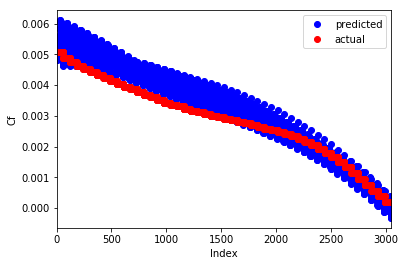

In [135]:
plot_net_data = pd.DataFrame(plot_net_data, columns = ["tau_pred", "tau_test", "U_pred", "U_test"])

points_plot = plot_net_data.sample(n=3050)
# print(points_plot)

points_plot['tau_pred'].plot(style='o', c= 'b', label='predicted')
points_plot['tau_test'].plot(style='o', c='r', label='actual')
plt.xlabel('Index')
plt.ylabel('Cf')

plt.legend()
plt.show()
